In [19]:
import pandas as pd
dataSet = pd.read_csv('advertising.csv')

In [20]:
dataSet.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
dataSet.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [22]:
import seaborn as sns

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

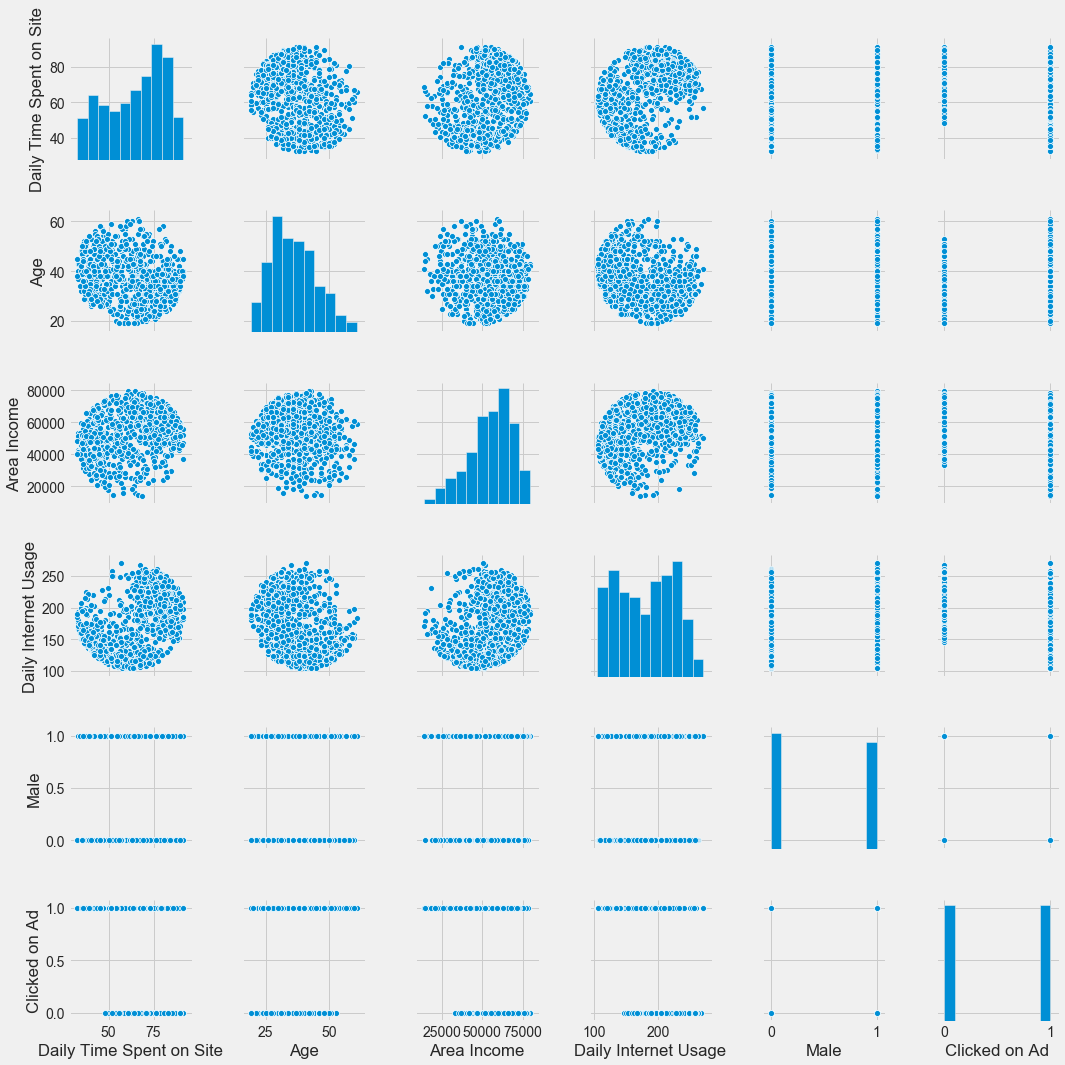

In [37]:
sns.pairplot(dataSet)

In [25]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

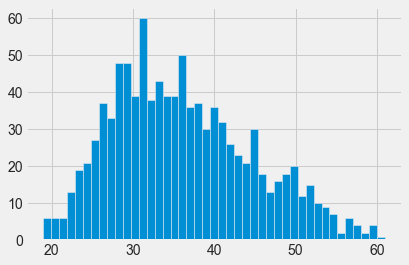

In [26]:
dataSet.Age.hist(bins=dataSet.Age.nunique())

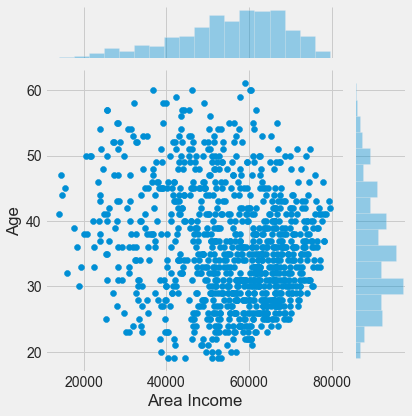

In [29]:
sns.jointplot(dataSet["Area Income"], dataSet.Age)

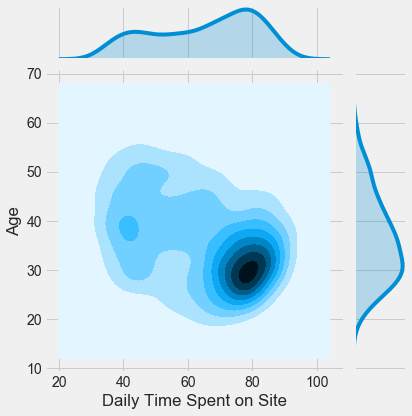

In [33]:
sns.jointplot(dataSet["Daily Time Spent on Site"], dataSet.Age, kind='kde')

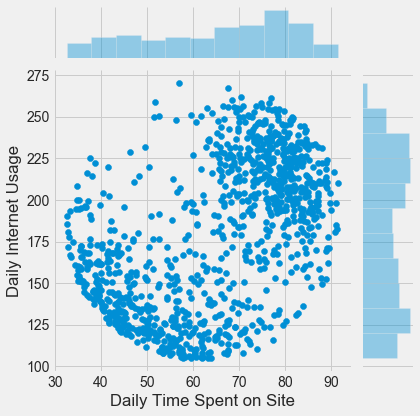

In [35]:
sns.jointplot(dataSet["Daily Time Spent on Site"], dataSet['Daily Internet Usage'])

/Users/mmt7309/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mmt7309/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


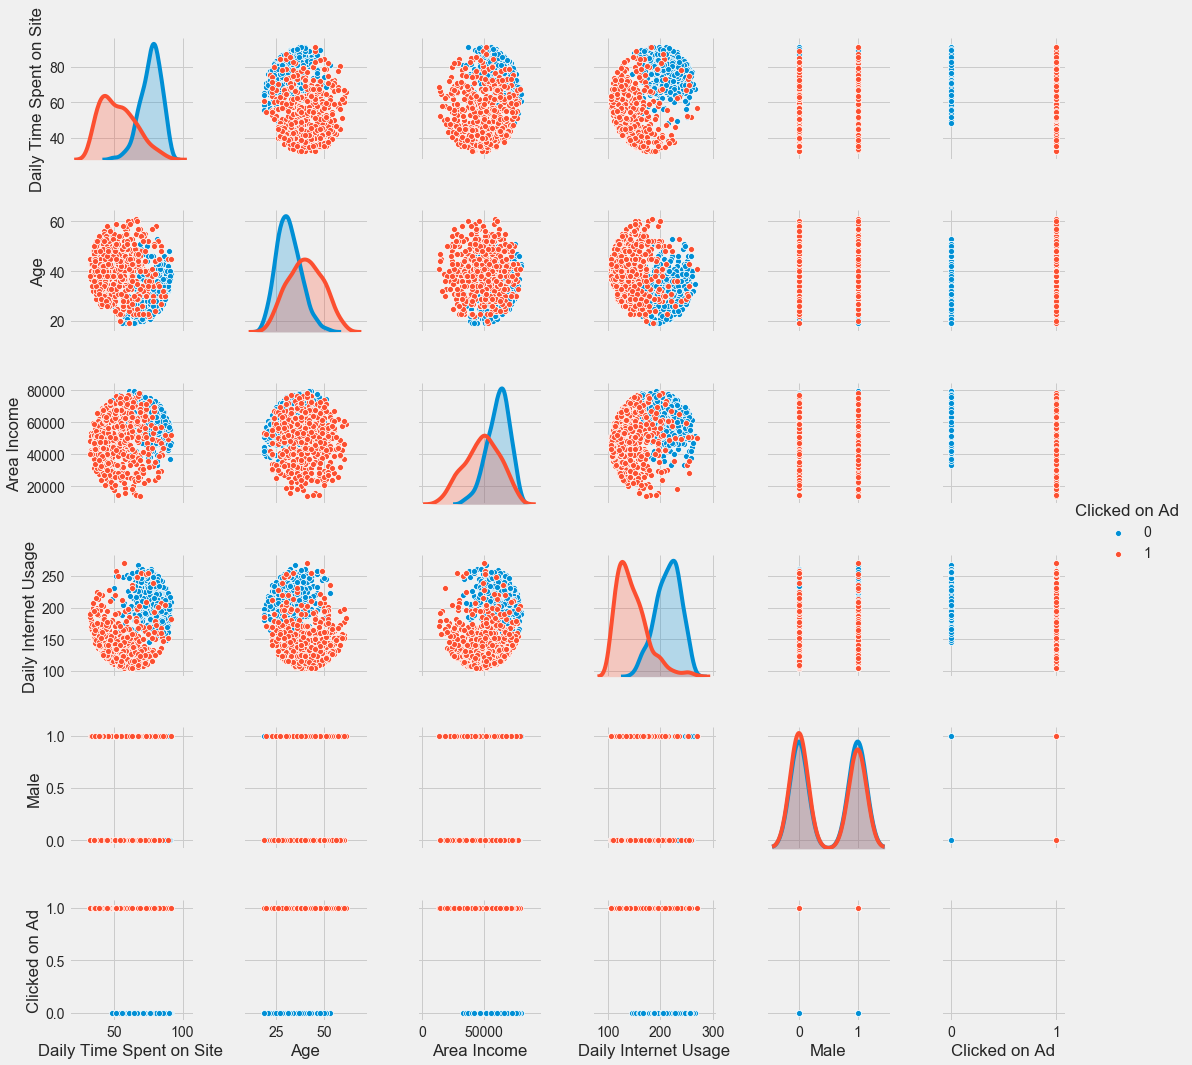

In [38]:
sns.pairplot(dataSet, hue='Clicked on Ad')

In [39]:
#'Sigmoid Function'

Text(0.5, 1.0, 'Sigmoid Function')

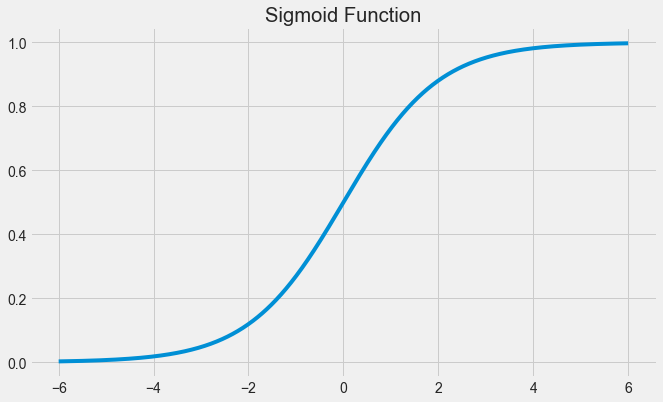

In [40]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")


In [83]:
def evalute(true,pred):
    
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
    precision=    precision_score(Y_test,Y_predict)
    recall = recall_score(Y_test, Y_predict)
    f1 = f1_score(Y_test, Y_predict)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
    

In [42]:
y_test

NameError: name 'y_test' is not defined

In [46]:
dataSet['Country']=dataSet.Country.astype('category').cat.codes

In [47]:
dataSet['City']=dataSet.Country.astype('category').cat.codes

In [51]:
x = dataSet.drop(['Timestamp','Clicked on Ad', 'Ad Topic Line'],axis=1)
y = dataSet['Clicked on Ad']

In [54]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test,Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=101)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
96,45.72,36,22473.08,154.02,94,1,94
507,49.99,41,61068.26,121.07,173,0,173
449,77.69,22,48852.58,169.88,5,1,5
726,67.47,24,60514.05,225.05,229,1,229
112,71.00,22,56067.38,211.87,63,0,63
...,...,...,...,...,...,...,...
629,73.94,26,55411.06,236.15,101,1,101
382,77.66,29,67080.94,168.15,74,0,74
840,72.46,40,56683.32,113.53,126,0,126
870,45.82,27,64410.80,171.24,63,1,63


In [61]:
from  sklearn.linear_model import LogisticRegression

In [64]:
log_regs =LogisticRegression(solver='liblinear',penalty='l1')

In [67]:
log_regs.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
Y_predict = log_regs.predict(X_test)

In [84]:
evalute(Y_test, Y_predict)

CONFUSION MATRIX:
[[155   2]
 [  5 138]]
ACCURACY SCORE:
0.9767
CLASSIFICATION REPORT:
	Precision: 0.9857
	Recall: 0.9650
	F1_Score: 0.9753


In [87]:
from sklearn.metrics import precision_recall_curve
precision, recall,threshold=precision_recall_curve(Y_predict, Y_test)

In [91]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim(0, 1.5)

In [92]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

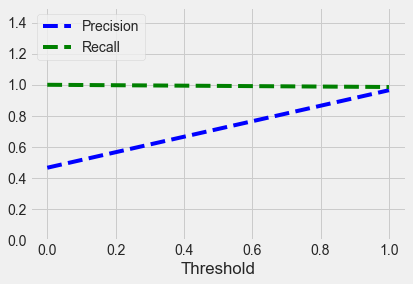

In [93]:
plot_precision_recall_vs_threshold(precision,recall,threshold)

In [95]:
plt.show()

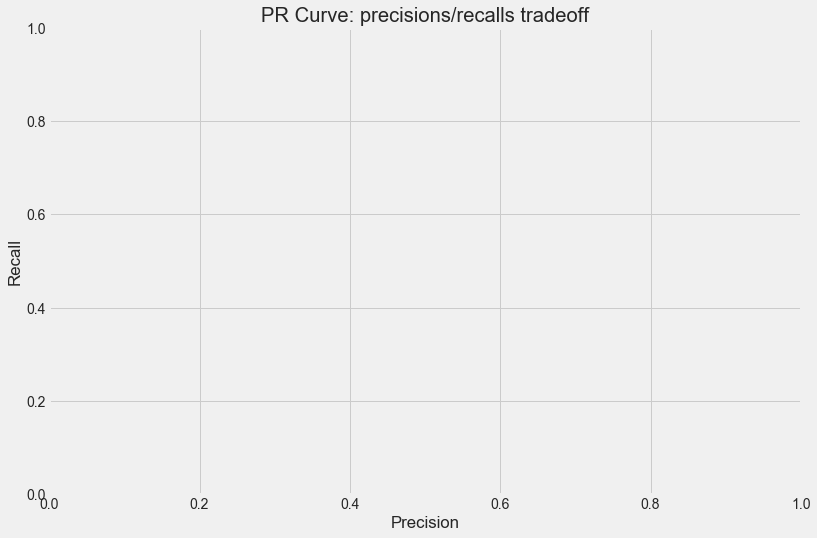

In [96]:
plt.figure(figsize=(12, 8))
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

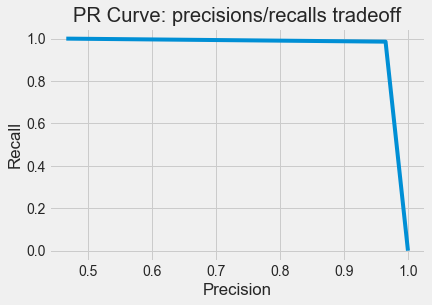

In [99]:
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

In [100]:
from sklearn.metrics import roc_curve

In [102]:
fpr, trp, threashold= roc_curve(Y_test,Y_predict)

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


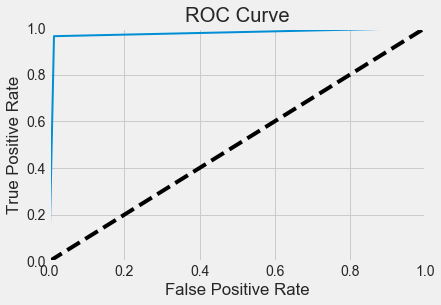

In [104]:
plot_roc_curve(fpr,trp,threashold)

In [105]:
from sklearn.metrics import roc_auc_score

In [108]:
roc_auc_score(Y_test,Y_predict)

0.9761480557658901

In [109]:
from sklearn.model_selection import GridSearchCV
penalty=['l1','l2']
C=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]


In [110]:
solver=['liblinear','saga']

In [111]:
param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)



In [113]:
grid = GridSearchCV(estimator=log_regs, param_grid=param_grid, scoring='roc_auc',
                    verbose=1, n_jobs=-1, cv=10, iid=True)

In [114]:
grid.fit(X_train,Y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 759 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   13.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                         'penalty': ['l1', 'l2'],
                    

In [116]:
grid_predict = grid.predict(X_test)

In [117]:
evalute(Y_test, grid_predict)

CONFUSION MATRIX:
[[154   3]
 [  5 138]]
ACCURACY SCORE:
0.9733
CLASSIFICATION REPORT:
	Precision: 0.9857
	Recall: 0.9650
	F1_Score: 0.9753
